# Load Dataset

In [25]:
from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

#Getting dimensions of training and test data
print("Initial shape or dimensions of x_train", str(x_train.shape))
print ("Number of samples in our training data: " + str(x_train.shape[0]))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (50000, 32, 32, 3)
Number of samples in our training data: 50000
Number of labels in our training data: 50000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(32, 32, 3)
Labels in x_train:(50000, 1)

Dimensions of x_test:(32, 32, 3)
Labels in y_test:(10000, 1)


# Prepare Trainining Data

In [26]:
#get rows and cols
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

#x_train and x_test are already in 4 dimensions, no need to reshape

input_shape = (img_rows,img_cols,3)

#change to float_32 type
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

#normalize
x_train /= 255
x_test  /= 255

# Hot One Encode

In [27]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Number of Classes: " + str(y_train.shape[1]))

num_classes = y_train.shape[1]

Number of Classes: 10


# Create Model

In [28]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32,(3,3),padding="same",activation='relu',input_shape=input_shape))
model.add(Conv2D(32,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
          
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))
          

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.1),metrics = ['accuracy'])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 64)         

In [29]:
epochs = 10
batch_size = 32

history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test,verbose=0)

model.save('cifar10_simplecnn_0.1.h5')

print('Loss: '+str(score[0]))
print('Accuracy: '+str(score[1]))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 37s 745us/sample - loss: 2.2352 - accuracy: 0.1539 - val_loss: 1.9982 - val_accuracy: 0.2949
Epoch 2/10
50000/50000 [==============================] - 35s 691us/sample - loss: 1.8375 - accuracy: 0.3251 - val_loss: 1.5775 - val_accuracy: 0.4077
Epoch 3/10
50000/50000 [==============================] - 36s 724us/sample - loss: 1.5486 - accuracy: 0.4349 - val_loss: 1.2864 - val_accuracy: 0.5349
Epoch 4/10
50000/50000 [==============================] - 37s 750us/sample - loss: 1.4001 - accuracy: 0.4971 - val_loss: 1.3000 - val_accuracy: 0.5263
Epoch 5/10
50000/50000 [==============================] - 42s 844us/sample - loss: 1.2905 - accuracy: 0.5401 - val_loss: 1.1335 - val_accuracy: 0.5971
Epoch 6/10
50000/50000 [==============================] - 38s 758us/sample - loss: 1.2104 - accuracy: 0.5748 - val_loss: 1.2247 - val_accuracy: 0.5846
Epoch 7/10
50000/50000 [====================

# Plotting Loss and Accuracy over Epochs

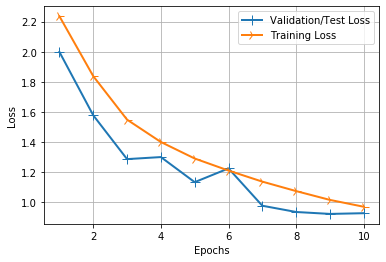

In [30]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig("Learning Rate/0.1_Loss.png")
plt.show()



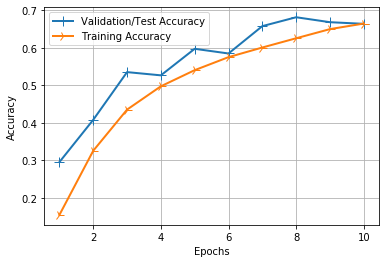

In [31]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig("Learning Rate/0.1_Acc.png")
plt.show()

